# **DATA LOADING**

In [1]:
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Edward\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# load in data from a jsonl file, print first 5 elements

file_path = 'Digital_Music.jsonl'
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

data[:5]

[{'rating': 5.0,
  'title': 'Nice',
  'text': 'If i had a dollar for how many times I have played this cd and how many times I have asked Alexa to play it, I would be rich. Love this singer along with the Black Pumas. Finding a lot of new music that I like a lot on amazon. Try new things.',
  'images': [],
  'asin': 'B004RQ2IRG',
  'parent_asin': 'B004RQ2IRG',
  'user_id': 'AFUOYIZBU3MTBOLYKOJE5Z35MBDA',
  'timestamp': 1618972613292,
  'helpful_vote': 0,
  'verified_purchase': True},
 {'rating': 5.0,
  'title': 'Excellent',
  'text': 'awesome sound - cant wait to see them in person - always miss them when they are in town !',
  'images': [],
  'asin': 'B0026UZEI0',
  'parent_asin': 'B0026UZEI0',
  'user_id': 'AHGAOIZVODNHYMNCBV4DECZH42UQ',
  'timestamp': 1308167525000,
  'helpful_vote': 0,
  'verified_purchase': True},
 {'rating': 5.0,
  'title': 'Great service',
  'text': 'This is a great cd. Good music and plays well. Seller responded back very quicky and  received it within 3 days',

In [3]:
# convert file to csv
csv_file_path = 'Digital_Music.csv'

fieldnames = data[0].keys()
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print("Data has been successfully converted to CSV.")

Data has been successfully converted to CSV.


In [4]:
# load the csv file
df = pd.read_csv("Digital_Music.csv")
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,1618972613292,0,True
1,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1308167525000,0,True
2,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,1615838793006,0,True
3,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,1405219741000,0,True
4,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1309029595000,0,False


# **DATA EXPLORATION**



In [5]:
# number of observations and summary statistics
num_observations = df.shape[0]
df.describe(include='all')

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
count,130434.000000,130406,130399,130434,130434,130434,130434,1.304340e+05,130434.000000,130434
unique,NaN,86009,118640,3269,70519,70511,100952,NaN,NaN,2
top,NaN,Five Stars,Great,[],B00003CXKT,B00003CXKT,AGAFM74L2RIJ5O36NNYH4Z5ISQNQ,NaN,NaN,True
freq,NaN,17294,400,127100,398,398,341,NaN,NaN,96033
mean,4.532837,NaN,NaN,NaN,NaN,NaN,NaN,1.469880e+12,1.045050,NaN
std,1.027994,NaN,NaN,NaN,NaN,NaN,NaN,1.369730e+11,3.485248,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.745575e+11,0.000000,NaN
25%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.400349e+12,0.000000,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.475705e+12,0.000000,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.573689e+12,1.000000,NaN


In [6]:
# check for missing data
df.isnull().sum()

rating                0
title                28
text                 35
images                0
asin                  0
parent_asin           0
user_id               0
timestamp             0
helpful_vote          0
verified_purchase     0
dtype: int64

In [7]:
df.dtypes

rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object

In [8]:
unique_values = df.nunique()

for column, unique_count in unique_values.items():
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'rating' has 5 unique values.
Column 'title' has 86009 unique values.
Column 'text' has 118640 unique values.
Column 'images' has 3269 unique values.
Column 'asin' has 70519 unique values.
Column 'parent_asin' has 70511 unique values.
Column 'user_id' has 100952 unique values.
Column 'timestamp' has 128745 unique values.
Column 'helpful_vote' has 96 unique values.
Column 'verified_purchase' has 2 unique values.


In [9]:
# count number of verified purchases vs. not verified purchases
df['verified_purchase'].value_counts()

verified_purchase
True     96033
False    34401
Name: count, dtype: int64

In [10]:
# see observations with missing title OR missing text

empty_title_or_text = df[(df['title'].isnull()) | (df['text'].isnull())]
empty_title_or_text

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
3514,5.0,NaN,Beautiful song,[],B07KC42LCV,B07KC42LCV,AG57MN3I7PVZP2GCQSVG77KHYSCA,1558879851627,0,True
11585,5.0,NaN,listen too,[],B07ZGL8MP6,B07ZGL8MP6,AGJATVTSGTPHR5SYDZZV3TKQTXBQ,1597784991788,0,True
11586,5.0,NaN,listening to,[],B07QPHD1FH,B07QPHD1FH,AGJATVTSGTPHR5SYDZZV3TKQTXBQ,1597503726341,0,True
12676,3.0,I like it,NaN,[],B0008JFQ8O,B0008JFQ8O,AGCJI4FXNAQJDCZS5FISCP6NKXRA,1627849943672,0,True
12677,3.0,I like it,NaN,[],B001E4CZGI,B001E4CZGI,AGCJI4FXNAQJDCZS5FISCP6NKXRA,1627849896522,0,True
15588,5.0,Five Stars,NaN,[],B00PTBZQ6S,B00PTBZQ6S,AEUQYMN7IVESRXCIZM4Q5QVNVHEA,1487107665000,0,True
20784,5.0,Rating,NaN,[],B09PGTMG8T,B09PGTMG8T,AG23W5SN5G4MDVFNEULOCQ2REUQA,1671891381419,0,True
22838,5.0,NaN,I am really enjoying my new cd.,[],B000EY5FAM,B000EY5FAM,AFUWOIDOULJLDGQQ33ZHQRDYYD2Q,1543353219723,0,True
25309,5.0,the whole CD is great listening,NaN,[],B01JT71BVQ,B01JT71BVQ,AGBOXS57LTAWM6B7UVIHSMMABQJQ,1601750267637,0,True
27022,5.0,Five Stars,NaN,[],B00PDNS8F8,B00PDNS8F8,AH2BVFJD6XD22W3STSD2W2B3ZJZQ,1495002483000,0,True


c:\Users\Edward\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Edward\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Edward\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Edward\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

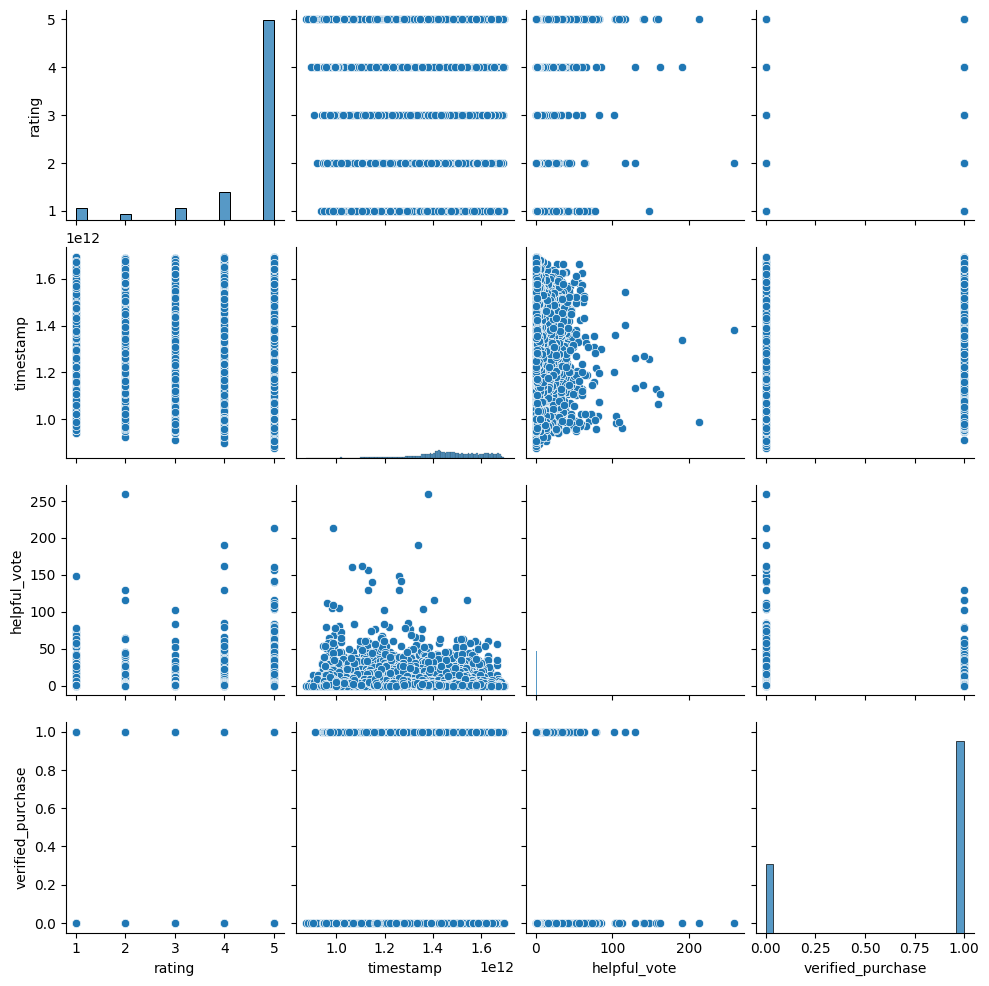

In [11]:
numerical_boolean_columns = df.select_dtypes(include=['number', 'bool']).columns
sns.pairplot(df[numerical_boolean_columns])
plt.show()

# **Data Preprocessing & First Model**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import re
import html
from imblearn.over_sampling import RandomOverSampler

In [13]:
"""clean text by removing HTML entities, emojis, and extra spaces."""
def clean_text(text):
    if pd.isna(text):
        return text
    
    text = str(text)
    
    # Remove any thml entities
    text = html.unescape(text)
    
    # Remove an html tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

In [14]:
"""data preprocessing function on the dataframe"""
def preprocess_data(df):
    # first we filter the dataframe to be verified purchases only
    df = df[df['verified_purchase'] == True].copy()
    
    df = df[['rating', 'title', 'text']].copy()
    
    # fill missing titles with text and vice versa
    df['title'] = df.apply(lambda x: x['text'] if pd.isna(x['title']) and not pd.isna(x['text']) else x['title'], axis=1)
    df['text'] = df.apply(lambda x: x['title'] if pd.isna(x['text']) and not pd.isna(x['title']) else x['text'], axis=1)
    
    # if both title and text are missing fill based on rating
    missing_mask = df['title'].isna() & df['text'].isna()
    df.loc[missing_mask & (df['rating'].isin([4, 5])), ['title', 'text']] = 'very good'
    df.loc[missing_mask & (df['rating'] == 3), ['title', 'text']] = 'good'
    df.loc[missing_mask & (df['rating'].isin([1, 2])), ['title', 'text']] = 'bad'
    
    # clean the titles and text
    df['title'] = df['title'].apply(clean_text)
    df['text'] = df['text'].apply(clean_text)
    
    # setup columns with features we want
    df['title_exclamations'] = df['title'].apply(lambda x: x.count('!') if pd.notna(x) else 0)
    df['title_questions'] = df['title'].apply(lambda x: x.count('?') if pd.notna(x) else 0)
    df['title_word_count'] = df['title'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
    
    df['text_exclamations'] = df['text'].apply(lambda x: x.count('!') if pd.notna(x) else 0)
    df['text_questions'] = df['text'].apply(lambda x: x.count('?') if pd.notna(x) else 0)
    df['text_word_count'] = df['text'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
    
    # >= 3 is positive rating, otherwise negative
    df['positive_review'] = (df['rating'] >= 3).astype(int)
    
    return df

In [15]:
"""Prepare features for modeling."""
def prepare_features(df):
    features = [
        'title_exclamations', 'title_questions', 'title_word_count',
        'text_exclamations', 'text_questions', 'text_word_count'
    ]
    
    X = df[features]
    y = df['positive_review']
    
    return X, y

In [16]:
processed_df = preprocess_data(df)
X, y = prepare_features(processed_df)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# featuer scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_scaled, y_train)

In [18]:
print("Original class distribution:")
print(pd.Series(y).value_counts(normalize=True))
print("\nResampled class distribution:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))

Original class distribution:
positive_review
1    0.93421
0    0.06579
Name: proportion, dtype: float64

Resampled class distribution:
positive_review
1    0.5
0    0.5
Name: proportion, dtype: float64


In [19]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

In [21]:
# classifiction report on training
print("Training Performance:")
print(classification_report(y_train, train_pred))

Training Performance:
              precision    recall  f1-score   support

           0       0.09      0.46      0.16      5054
           1       0.95      0.69      0.80     71772

    accuracy                           0.67     76826
   macro avg       0.52      0.57      0.48     76826
weighted avg       0.89      0.67      0.75     76826



In [22]:
# classifiction report on testing
print("\nTest Performance:")
print(classification_report(y_test, test_pred))


Test Performance:
              precision    recall  f1-score   support

           0       0.09      0.47      0.16      1264
           1       0.95      0.68      0.79     17943

    accuracy                           0.67     19207
   macro avg       0.52      0.58      0.48     19207
weighted avg       0.89      0.67      0.75     19207



In [23]:
# Fitting Curve

complexity_values = np.logspace(-3, 3, 20)  # from simple to very complex
train_errors = []
test_errors = []

for C in complexity_values:
    model = LogisticRegression(random_state=42, max_iter=1000, C=C)
    model.fit(X_train_balanced, y_train_balanced)
    
    train_probs = model.predict_proba(X_train_scaled)
    test_probs = model.predict_proba(X_test_scaled)
    
    train_loss = log_loss(y_train, train_probs)
    test_loss = log_loss(y_test, test_probs)
    
    train_errors.append(train_loss)
    test_errors.append(test_loss)

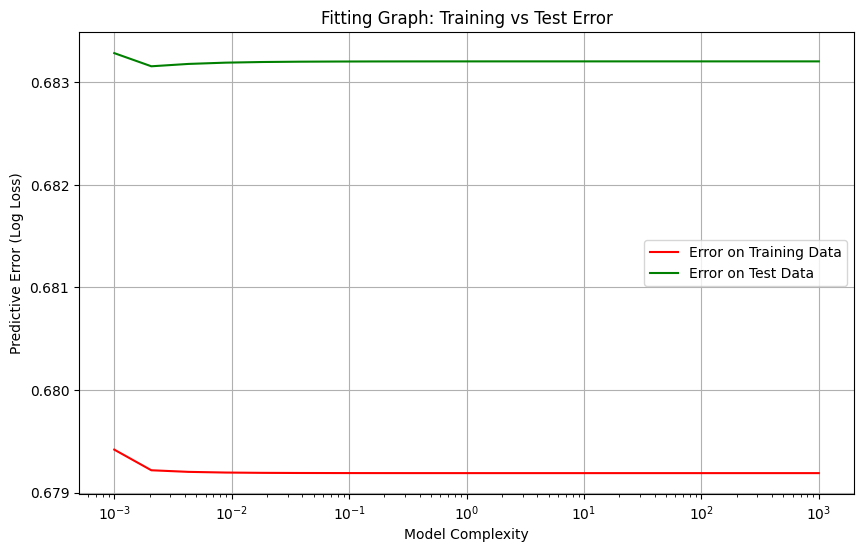

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(complexity_values, train_errors, label="Error on Training Data", color='red')
plt.plot(complexity_values, test_errors, label="Error on Test Data", color='green')
plt.xscale('log')  # logarithmic scale for complexity
plt.xlabel("Model Complexity")
plt.ylabel("Predictive Error (Log Loss)")
plt.title("Fitting Graph: Training vs Test Error")
plt.legend()
plt.grid(True)
plt.show()

## First Model Analysis


### Current Model Performance:

Training vs Testing performance is very similar, which indicates the model is not overfitting:
- Training accuracy: 0.67
- Testing accuracy: 0.67

Both also show similar metrics across precision, recall, and F1-score.

Another thing to note is that the F1-score for the negative class is 0.16 both training and testing, whereas the F1-score for the positive class is much higher at around 0.79-0.80. This tell us that the imbalance within the dataset is still an issue, and we need to take better measures to reduce this issue.

### Fitting Assessment:
Based on the fitting graph, there might be slight underfitting as model complexity increases. The training error goes down as the number of
degrees increases (so as model complexity increases) and so does the testing error too.

### Possible Improvements:

We could focus on better feature engineering. For example, creating new interaction features between our original columns and/or considering polynomial features. Additionally, we could try better techniques to account for the class imbalances such as using SMOTE instead of random oversampling and/or combining oversampling with undersampling (SMOTETomek or SMOTEENN).
In addition, we could try using specific words in the texts as columns, like whether it contains "good" or "bad".


### Next Models to Try (in order):
Our final conclusion is this logistic regression model we have made is not sufficient in predicting whether a rating is good or bad from the title & text. Next, we look to apply better feature engineering and class imbalance techniques with more powerful models that can capture non-linear relationships such as decision trees. Decision trees would be especially helpful when considering the words in specific reviews, so we could add columns in the data for whether they contain certain keywords.

# Second Model

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

processed_df['combined_text'] = processed_df['title'] + " " + processed_df['text']

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(processed_df['combined_text'])

y = processed_df['positive_review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", pd.Series(y_train).value_counts())
print("Class distribution after SMOTE:", pd.Series(y_train_balanced).value_counts())

Class distribution before SMOTE: positive_review
1    71772
0     5054
Name: count, dtype: int64
Class distribution after SMOTE: positive_review
1    71772
0    71772
Name: count, dtype: int64


In [27]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y)), 
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb.fit(X_train_balanced, y_train_balanced)

c:\Users\Edward\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [15:39:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, num_parallel_tree=None, ...)

In [28]:
print(classification_report(y_train, xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75      5054
           1       0.99      0.97      0.98     71772

    accuracy                           0.96     76826
   macro avg       0.82      0.93      0.87     76826
weighted avg       0.97      0.96      0.96     76826



In [29]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.74      0.62      1264
           1       0.98      0.95      0.97     17943

    accuracy                           0.94     19207
   macro avg       0.76      0.85      0.79     19207
weighted avg       0.95      0.94      0.94     19207



In [30]:
import matplotlib.pyplot as plt

# Fitting Curve
max_depth_values = range(1, 12)  # From 1 (simple) to 12 (complex)
train_errors = []
test_errors = []

for max_depth in max_depth_values:
    xgb = XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y_train_balanced)),  
        eval_metric='mlogloss',
        max_depth=max_depth  
    )
    
    xgb.fit(X_train_balanced, y_train_balanced)
    
    train_probs = xgb.predict_proba(X_train)
    test_probs = xgb.predict_proba(X_test)
    
    train_loss = log_loss(y_train, train_probs)
    test_loss = log_loss(y_test, test_probs)
    
    train_errors.append(train_loss)
    test_errors.append(test_loss)

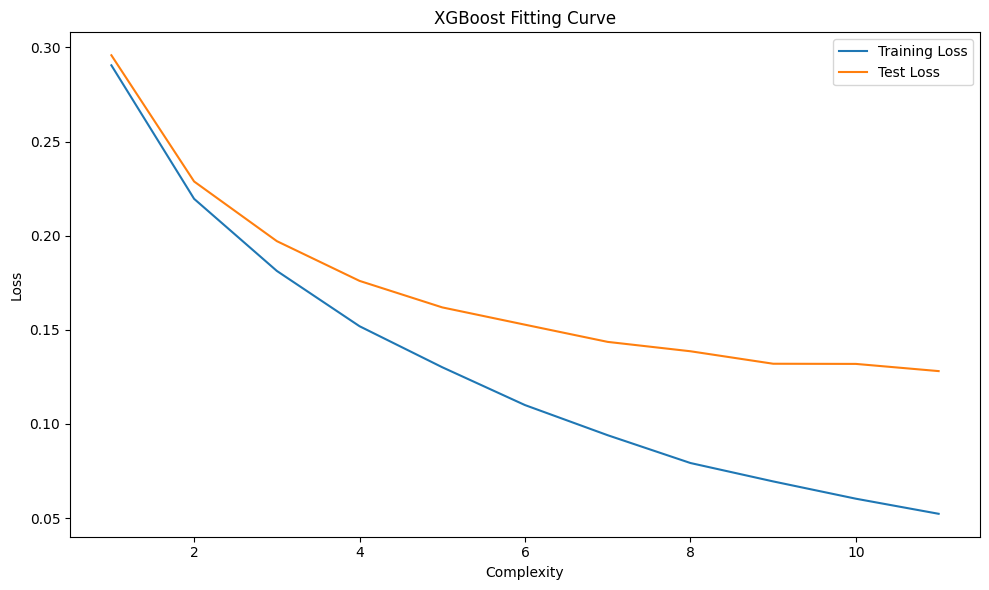

In [31]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label='Training Loss')
plt.plot(max_depth_values, test_errors, label='Test Loss')
plt.xlabel('Complexity')
plt.ylabel('Loss')
plt.title('XGBoost Fitting Curve')
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, xgb.predict(X_test)).ravel()

print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")

True Positives (TP): 17377
False Positives (FP): 389
False Negatives (FN): 566
True Negatives (TN): 875


### Current Model Performance:
While precision, recall, and F1-score for **Class 1** (the majority class) are very high and consistent across both training and testing, the performance for **Class 0** (the minority class) drops notably in the test set. Specifically, recall and F1-score for **Class 0** are much higher during training than testing, indicating the model is better at identifying **Class 0** in the training data but struggles with generalization. Overall accuracy is higher in the training set (96%) than the test set (94%), and both the macro and weighted average F1-scores are also higher during training. These results suggest that the model is overly adapted to the training data and may benefit from techniques like regularization, resampling, or tuning to improve generalization and address the class imbalance.

Overall though, it performs much better than the first model we made.

### Fitting Assessment:
Based on the fitting graph, there might be slight underfitting. The training error and test error are both decreasing as the number of iterations increases, but the train error is getting lower than the test error.

### Possible Improvements:
1. Fine-tuning Hyperparameters:
    - Fine-tuning the learning rate (also known as eta in XGBoost) can help balance model performance. 
    - Max Depth: Experiment with different tree depths to control the complexity of the trees. Shallow trees might underfit, while too deep trees can overfit.

2. Further SMOTE Improvements
    - SMOTE Variants: Besides basic SMOTE, consider using variants like [Borderline-SMOTE or ADASYN](https://towardsdatascience.com/class-imbalance-smote-borderline-smote-adasyn-6e36c78d804), which generate synthetic samples based on boundary regions or difficult-to-classify examples.
    
3. Cross-Validation
    - Stratified Cross-Validation: Ensure we're using stratified K-fold cross-validation to maintain the class distribution in each fold, which is crucial for imbalanced datasets.

### Next Models to Try:
We are considering using ensemble methods as a next step. For example, we can first, use a classifier (like XGBoost) to predict whether the instance belongs to the minority or majority class. Then, for the minority class predictions, we can apply a more specialized classifier that focuses on fine-tuning the model's performance for those cases. Additionally, we are also thinking of using deep neural network models (like BERT-based) for better sentiment understanding in the text.